Pregunta 3

In [41]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import beta, binom, betabinom, chi2, mode, uniform
import arviz as az

In [44]:
n = 20
x =15

#parametros de una beta 1,1 que elegimos como previa (uniforme)
a = 1
b = 1

a_posterior = a+x
b_posterior = b+n-x

theta_grid = np.linspace(0, 1, num=200)
x_grid     = np.arange(0, 10)

likelihood = beta.pdf(theta_grid, x+1, n-x+1)
prior      = beta.pdf(theta_grid, a, b)

posterior_approx = prior * likelihood

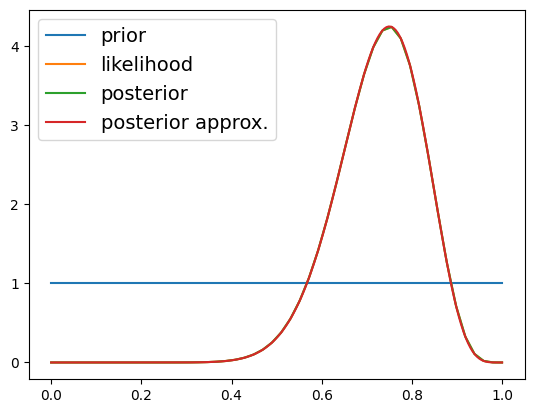

In [45]:
theta_plot = np.linspace(0, 1)
posterior  = beta.pdf(theta_plot, a_posterior, b_posterior)

#plt.figure(figsize=(12,10))
plt.plot(theta_plot, beta.pdf(theta_plot, a, b), label='prior')
plt.plot(theta_plot, beta.pdf(theta_plot, x+1, n-x+1), label='likelihood')
plt.plot(theta_plot, posterior, label='posterior')

plt.plot(theta_grid, posterior_approx, label='posterior approx.')
plt.legend(fontsize=14)

In [ ]:
n_sample = 10**4
posterior_sample = random.choices(theta_grid, weights=posterior_approx, k=n_sample)

plt.plot(theta_grid, prior, label='prior')
plt.plot(theta_grid, likelihood, label='likelihood')
sns.kdeplot(posterior_sample, label='sampled posterior')
plt.plot(theta_grid, posterior_approx, label='posterior approx.')
plt.legend(fontsize=14)

In [ ]:
hist = plt.hist(posterior_sample, bins=30, density=True, color='RebeccaPurple', alpha=0.5)


In [ ]:
width = (np.diff(hist[1]))[0]
middle_points = hist[1][:-1]
normalized_heights = hist[0] / hist[0].max()
plt.bar(middle_points, normalized_heights, width, color='RebeccaPurple')

In [52]:
alpha = 0.05
point_cut = np.exp(-0.5 * chi2.ppf(1-alpha, 1))
extreme_points = middle_points[normalized_heights >= point_cut][[0,-1]]

extreme_points

array([0.54120603, 0.880067  ])

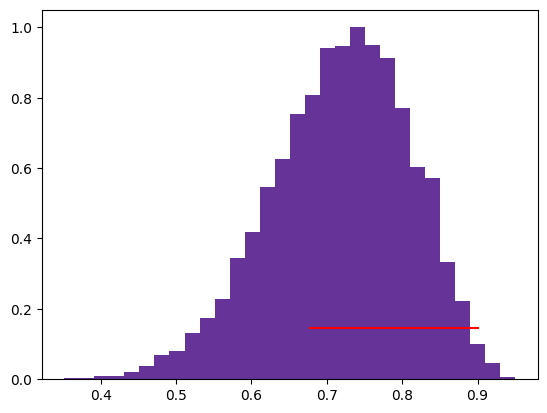

In [53]:
plt.bar(middle_points, normalized_heights, width, color='RebeccaPurple')
plt.axhline(point_cut, extreme_points[0], extreme_points[1], color='r')

In [39]:

posterior_sample = pd.Series(posterior_sample)

In [40]:
sum(posterior_sample > 0.5) / n_sample

0.9843

Pregunta 4

In [54]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import beta, binom, betabinom, chi2, mode, uniform
import arviz as az

Inciso A

In [55]:
n = 9
x =6

#parametros de la uniforme
a = 0.5
b = 1

In [56]:
theta_grid = np.linspace(0, 1, num=500)
x_grid     = np.arange(0, 10)


likelihood = beta.pdf(theta_grid, x+1, n-x+1)
prior      = uniform.pdf(theta_grid,a,b)

#se hace la aproximación
posterior_approx = prior * likelihood

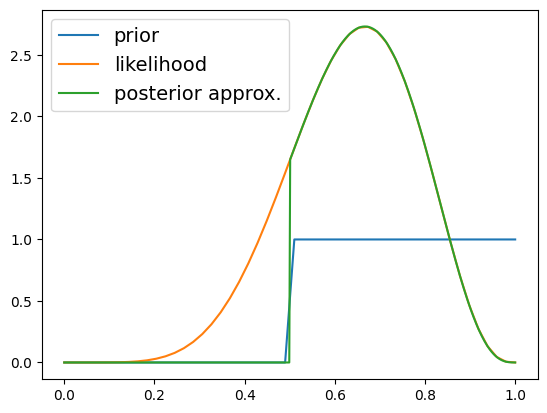

In [58]:
theta_plot = np.linspace(0, 1)

#plt.figure(figsize=(12,10))
plt.plot(theta_plot, uniform.pdf(theta_plot, a, b), label='prior')
plt.plot(theta_plot, beta.pdf(theta_plot, x+1, n-x+1), label='likelihood')
plt.plot(theta_grid, posterior_approx, label='posterior approx.')
plt.legend(fontsize=14)

Inciso B

In [ ]:
#Simular de la posterior

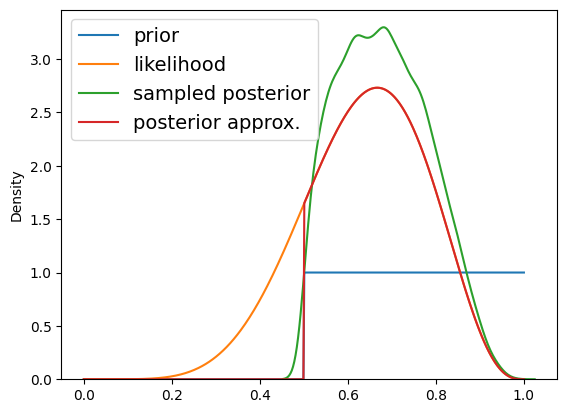

In [59]:
n_sample = 10**4
posterior_sample = random.choices(theta_grid, weights=posterior_approx, k=n_sample)

plt.plot(theta_grid, prior, label='prior')
plt.plot(theta_grid, likelihood, label='likelihood')
sns.kdeplot(posterior_sample, label='sampled posterior')
plt.plot(theta_grid, posterior_approx, label='posterior approx.')
plt.legend(fontsize=14)

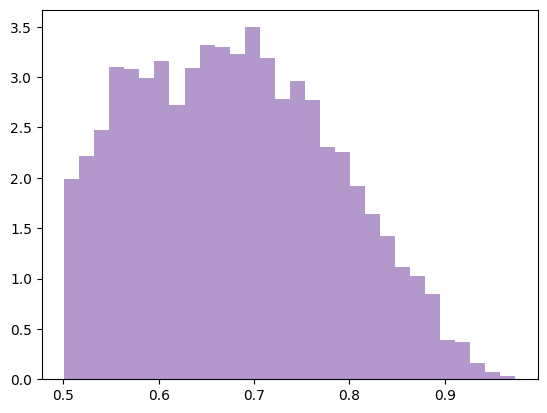

In [ ]:
hist = plt.hist(posterior_sample, bins=30, density=True, color='RebeccaPurple', alpha=0.5)

inciso c)

In [60]:
#MAP con el mode de la muestra
mode(posterior_sample)
mode(posterior_sample)[0][0] # MAP

<ipython-input-60-4c17236c5a51>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(posterior_sample)
<ipython-input-60-4c17236c5a51>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(posterior_sample)[0][0] # MAP


0.6873747494989979

In [61]:
#MAP con histograma

In [63]:
hist[1][np.argmax(hist[0])] # MAP

0.7405360134003351

Pregunta 5

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
from scipy.stats import norm, uniform, lognorm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, multivariate_normal, binom

import arviz as az

In [67]:
dat = pd.read_csv('Howell1.csv', sep=';')

In [68]:
#normalizar como indica las instrucciones
dat_weight_s = (dat['weight']-dat['weight'].mean())/dat['weight'].std()

In [69]:
dat_weight_s.head()

0    0.829869
1    0.059459
2   -0.254483
3    1.184257
4    0.384957
Name: weight, dtype: float64

In [70]:
#agarrar min y max de normalizada
x_min, x_max = dat_weight_s.min(), dat_weight_s.max()

In [71]:
n_pre_prior = 100

sample_alpha = norm.rvs(size=n_pre_prior, loc=170, scale=10)
sample_beta1  = lognorm.rvs(size=n_pre_prior, s=1)
sample_beta2  = norm.rvs(size=n_pre_prior, loc=0, scale=1)

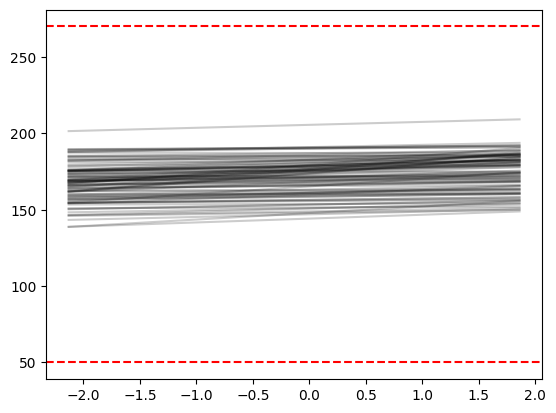

In [72]:
_ = plt.plot([x_min, x_max],
         [sample_alpha+sample_beta1*(x_min)+sample_beta2*(x_min)**2,
          sample_alpha+sample_beta1*(x_max)+sample_beta2*(x_max)**2], color='k', alpha=0.2)
plt.axhline(50, linestyle='--', color='red')
plt.axhline(270, linestyle='--', color='red')

Pregunta 6

In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, multivariate_normal, binom

import pymc as pm
import arviz as az

<Axes: xlabel='weight', ylabel='height'>

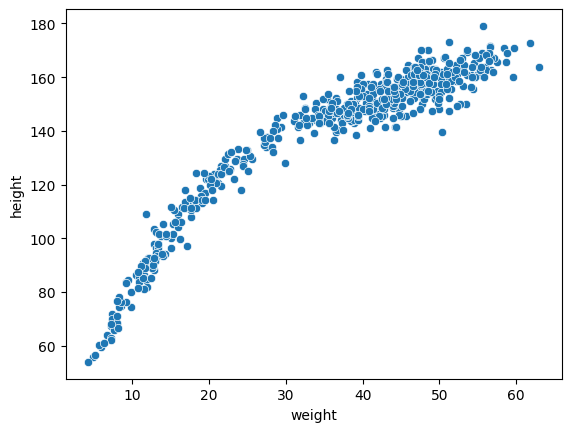

In [74]:
#veamos un gráfico de dispersión
sns.scatterplot(data=dat, x='weight', y='height')

In [75]:
#normalizar como indica las instrucciones
dat_weight_s = (dat['weight']-dat['weight'].mean())/dat['weight'].std()

In [76]:
#agarrar min y max de normalizada
x_min, x_max = dat_weight_s.min(), dat_weight_s.max()

In [77]:
#modelo 
#usamos los datos normalizados en la pregunta anterior
with pm.Model() as model_height_weight_3:
    alpha    = pm.Normal('alpha', mu=170, sigma=10)
    beta1    = pm.Normal('beta1', mu=0, sigma=10)
    beta2    = pm.Normal('beta2', mu=0, sigma=10)
    beta3    = pm.Normal('beta3', mu=0, sigma=10)
    mu       = pm.Deterministic('mu', alpha + beta1*dat_weight_s + beta2*dat_weight_s**2 + beta3*dat_weight_s**3)
    sigma1    = pm.Uniform('sigma', lower=0, upper=50)
    height   = pm.Normal('height',mu=mu,sigma=sigma1, observed=dat['height'])
    par_post = pm.find_MAP()
    hessian  = pm.find_hessian(par_post, vars=[alpha, beta1, beta2, beta3, sigma1])
    
st_dev = np.diag(np.linalg.inv(hessian))**0.5

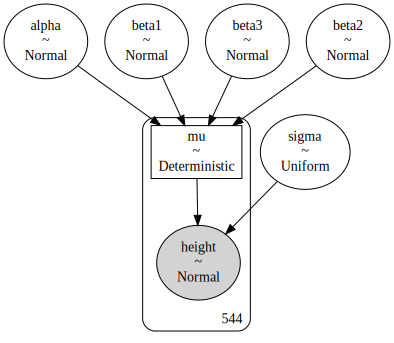

In [78]:
#visualmente vemos el modelo (jerarquía)
pm.model_to_graphviz(model_height_weight_3)

In [79]:
#veamos si son buenas previas
n_pre_prior = 100
sample_alpha = norm.rvs(size=n_pre_prior, loc=170, scale=10)
sample_beta1  = norm.rvs(size=n_pre_prior, loc=0, scale=10)
sample_beta2  = norm.rvs(size=n_pre_prior, loc=0, scale=10)
sample_beta3  = norm.rvs(size=n_pre_prior, loc=0, scale=10)

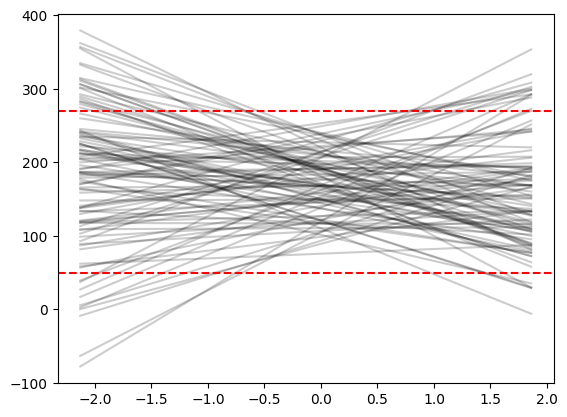

In [80]:
_ = plt.plot([x_min, x_max],
         [sample_alpha+sample_beta1*(x_min)+sample_beta2*(x_min)**2+sample_beta3*(x_min)**3,
          sample_alpha+sample_beta1*(x_max)+sample_beta2*(x_max)**2+sample_beta3*(x_max)**3], color='k', alpha=0.2)
#alturas registradas mas altas y bajas de la historia en rojo como referencia
plt.axhline(50, linestyle='--', color='red')
plt.axhline(270, linestyle='--', color='red')

In [81]:
x_min, x_max = dat['weight'].min(), dat['weight'].max()

In [82]:
#maps
weight_seq = np.linspace(x_min, x_max) 
map = []

#normalizar pesos de nuevo ahora con el seq
for i in range(len(weight_seq)):
    map.append(par_post['alpha'] + \
                         par_post['beta1']*(weight_seq[i]-dat['weight'].mean())/dat['weight'].std() + \
                         par_post['beta2']*((weight_seq[i]-dat['weight'].mean())/dat['weight'].std())**2 +\
                         par_post['beta3']*((weight_seq[i]-dat['weight'].mean())/dat['weight'].std())**3)

MAP = pd.DataFrame(map, columns=['regression'])
MAP['weight'] = weight_seq

In [83]:
sample_alpha = norm.rvs(size=10**4, loc=par_post['alpha'], scale=st_dev[0])
sample_beta1 = norm.rvs(size=10**4, loc=par_post['beta1'], scale=st_dev[1])
sample_beta2 = norm.rvs(size=10**4, loc=par_post['beta2'], scale=st_dev[2])
sample_beta3 = norm.rvs(size=10**4, loc=par_post['beta3'], scale=st_dev[3])
sample_sigma = norm.rvs(size=10**4, loc=par_post['sigma'], scale=st_dev[4])

In [84]:
Int_Conf = pd.DataFrame(
    np.quantile(sample_alpha + \
                sample_beta1*(x_min-dat['weight'].mean())/dat['weight'].std() + \
                sample_beta2*((x_min-dat['weight'].mean())/dat['weight'].std())**2 + sample_beta3*((x_min-dat['weight'].mean())/dat['weight'].std())**3, [0.025, 0.975]).reshape(1,2),
    columns=['LCI', 'UCI'])
    

for i in range(1, len(weight_seq)):
    Int_Conf = pd.concat(
        [Int_Conf,
         pd.DataFrame(
             np.quantile(sample_alpha + \
                         sample_beta1*(weight_seq[i]-dat['weight'].mean())/dat['weight'].std() + \
                         sample_beta2*((weight_seq[i]-dat['weight'].mean())/dat['weight'].std())**2 + \
                         sample_beta3*((weight_seq[i]-dat['weight'].mean())/dat['weight'].std())**3,
                         [0.025, 0.975]).reshape(1,2),
             columns=['LCI', 'UCI'])
          ])

Int_Conf['weight'] = weight_seq

In [85]:
height_sample = norm.rvs(size=10**4,
             loc=sample_alpha + \
                       sample_beta1*(x_min-dat['weight'].mean())/dat['weight'].std() + \
                       sample_beta2*((x_min-dat['weight'].mean())/dat['weight'].std())**2 +\
                       sample_beta3*((x_min-dat['weight'].mean())/dat['weight'].std())**3,
             scale=sample_sigma)

Int_Pred = pd.DataFrame(np.quantile(height_sample, [0.025, 0.975]).reshape(1,2), columns=['LPI', 'UPI'])


for i in range(1, len(weight_seq)):
    height_sample = norm.rvs(size=10**4,
             loc=sample_alpha + \
                           sample_beta1*(weight_seq[i]-dat['weight'].mean())/dat['weight'].std() + \
                           sample_beta2*((weight_seq[i]-dat['weight'].mean())/dat['weight'].std())**2 +\
                           sample_beta3*((weight_seq[i]-dat['weight'].mean())/dat['weight'].std())**3,
             scale=sample_sigma)
    
    Int_Pred = pd.concat([Int_Pred,
                                     pd.DataFrame(np.quantile(height_sample, [0.025, 0.975]).reshape(1,2), columns=['LPI', 'UPI'])])

Int_Pred['weight'] = weight_seq

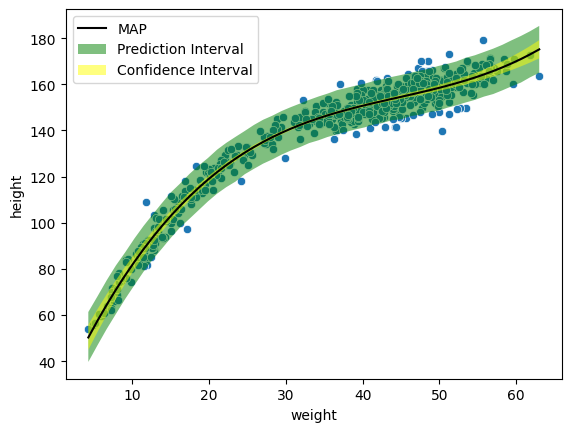

In [86]:
sns.scatterplot(data=dat, x='weight', y='height')

plt.plot(MAP['weight'], MAP['regression'], color='k', label='MAP')

plt.fill_between(Int_Pred['weight'], Int_Pred['LPI'], Int_Pred['UPI'],
                 facecolor='green', alpha=0.5, label='Prediction Interval')

plt.fill_between(Int_Conf['weight'], Int_Conf['LCI'], Int_Conf['UCI'],
                 facecolor='yellow', alpha=0.5, label='Confidence Interval')
plt.legend()

Pregunta 7

In [106]:
#reset de datos
dat = pd.read_csv('Howell1.csv', sep=';')

In [107]:
dat_log = np.log(dat['weight'])
dat_log.head()

0    3.867561
1    3.596923
2    3.461503
3    3.971082
4    3.720302
Name: weight, dtype: float64

In [108]:
#agarrar min y max de log
x_min, x_max = dat_log.min(), dat_log.max()

In [109]:
with pm.Model() as model_log_weight:
    alpha    = pm.Normal('alpha', mu=170, sigma=10)
    beta1    = pm.Normal('beta1', mu=0, sigma=7)
    sigma1   = pm.Uniform('sigma', lower=0, upper=50)
    mu       = pm.Deterministic('mu', alpha + beta1*(dat_log))
    height   = pm.Normal('height',mu=mu ,sigma=sigma1, observed=dat['height'])
    par_post = pm.find_MAP()
    hessian  = pm.find_hessian(par_post, vars=[alpha, beta1, sigma1])
    
st_dev = np.diag(np.linalg.inv(hessian))**0.5

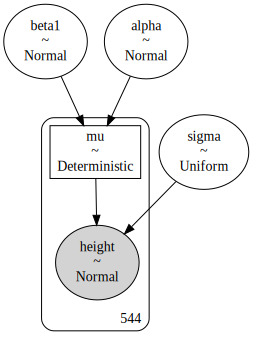

In [110]:
#visualizar modelo
pm.model_to_graphviz(model_log_weight)

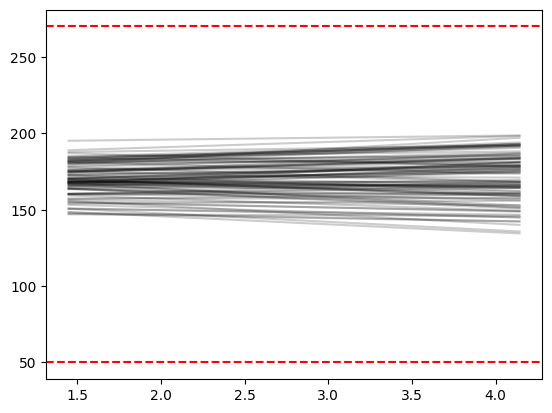

In [111]:
#Previa sensata?
n_pre_prior = 100
sample_alpha = norm.rvs(size=n_pre_prior, loc=170, scale=10)
sample_beta1  =norm.rvs(size=n_pre_prior, loc=0, scale=3)

_ = plt.plot([x_min, x_max],
         [sample_alpha+sample_beta1*(x_min),
          sample_alpha+sample_beta1*(x_max)], color='k', alpha=0.2)
plt.axhline(50, linestyle='--', color='red')
plt.axhline(270, linestyle='--', color='red')


In [112]:
x_min, x_max = dat['weight'].min(), dat['weight'].max()

In [113]:
#maps
weight_seq = np.linspace(x_min, x_max) 
map = []

for i in range(len(weight_seq)):
    map.append(par_post['alpha'] + \
                         par_post['beta1']*(np.log(weight_seq[i])))

MAP = pd.DataFrame(map, columns=['regression'])
MAP['weight'] = weight_seq

In [114]:
sample_alpha = norm.rvs(size=10**4, loc=par_post['alpha'], scale=st_dev[0])
sample_beta1 = norm.rvs(size=10**4, loc=par_post['beta1'], scale=st_dev[1])
sample_sigma = norm.rvs(size=10**4, loc=par_post['sigma'], scale=st_dev[2])

In [115]:
Int_Conf = pd.DataFrame(
    np.quantile(sample_alpha + \
                sample_beta1*np.log(x_min), [0.025, 0.975]).reshape(1,2),
    columns=['LCI', 'UCI'])

In [116]:
for i in range(1, len(weight_seq)):
    Int_Conf = pd.concat(
        [Int_Conf,
         pd.DataFrame(
             np.quantile(sample_alpha + \
                         sample_beta1*((np.log(weight_seq[i]))),
                         [0.025, 0.975]).reshape(1,2),
             columns=['LCI', 'UCI'])
          ])

Int_Conf['weight'] = weight_seq

In [117]:
height_sample = norm.rvs(size=10**4,
             loc=sample_alpha + \
                       sample_beta1*np.log(x_min) ,
             scale=sample_sigma)

Int_Pred = pd.DataFrame(np.quantile(height_sample, [0.025, 0.975]).reshape(1,2), columns=['LPI', 'UPI'])


for i in range(1, len(weight_seq)):
    height_sample = norm.rvs(size=10**4,
             loc=sample_alpha + \
                           sample_beta1*((np.log(weight_seq[i]))) ,
             scale=sample_sigma)
    
    Int_Pred = pd.concat([Int_Pred,
                                     pd.DataFrame(np.quantile(height_sample, [0.025, 0.975]).reshape(1,2), columns=['LPI', 'UPI'])])

Int_Pred['weight'] = weight_seq

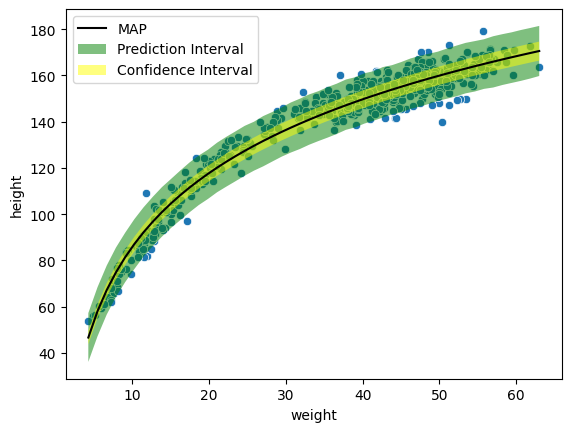

In [118]:
sns.scatterplot(data=dat, x='weight', y='height')
plt.plot(MAP['weight'], MAP['regression'], color='k', label='MAP')
plt.fill_between(Int_Pred['weight'], Int_Pred['LPI'], Int_Pred['UPI'],
                 facecolor='green', alpha=0.5, label='Prediction Interval')
plt.fill_between(Int_Conf['weight'], Int_Conf['LCI'], Int_Conf['UCI'],
                 facecolor='yellow', alpha=0.5, label='Confidence Interval')
plt.legend()

Pregunta 8

In [119]:
dat = pd.read_csv('Howell1.csv', sep=';')
Pesos = np.sort(np.array((46.95, 43.72, 64.78, 32.59, 54.63)))

In [120]:
dat_log = np.log(dat['weight'])

In [121]:
#agarrar min y max de log
x_min, x_max = dat_log.min(), dat_log.max()

In [122]:
with pm.Model() as model_log_weight:
    alpha    = pm.Normal('alpha', mu=170, sigma=10)
    beta1    = pm.Normal('beta1', mu=0, sigma=7)
    sigma1   = pm.Uniform('sigma', lower=0, upper=50)
    mu       = pm.Deterministic('mu', alpha + beta1*(dat_log))
    height   = pm.Normal('height',mu=mu ,sigma=sigma1, observed=dat['height'])
    par_post = pm.find_MAP()
    hessian  = pm.find_hessian(par_post, vars=[alpha, beta1, sigma1])
    
st_dev = np.diag(np.linalg.inv(hessian))**0.5

In [142]:
x_min, x_max = dat['weight'].min(), dat['weight'].max()

In [143]:
#maps
weight_seq = Pesos
map = []

for i in range(len(weight_seq)):
    map.append(par_post['alpha'] + \
                         par_post['beta1']*(np.log(weight_seq[i])))

MAP = pd.DataFrame(map, columns=['regression'])
MAP['weight'] = weight_seq

In [144]:
sample_alpha = norm.rvs(size=10**4, loc=par_post['alpha'], scale=st_dev[0])
sample_beta1 = norm.rvs(size=10**4, loc=par_post['beta1'], scale=st_dev[1])
sample_sigma = norm.rvs(size=10**4, loc=par_post['sigma'], scale=st_dev[2])

In [145]:
Int_Conf = pd.DataFrame(
    np.quantile(sample_alpha + \
                sample_beta1*np.log(x_min), [0.055, 0.945]).reshape(1,2),
    columns=['LCI', 'UCI'])

In [146]:
for i in range(1, len(weight_seq)):
    Int_Conf = pd.concat(
        [Int_Conf,
         pd.DataFrame(
             np.quantile(sample_alpha + \
                         sample_beta1*((np.log(weight_seq[i]))),
                         [0.055, 0.945]).reshape(1,2),
             columns=['LCI', 'UCI'])
          ])

Int_Conf['weight'] = weight_seq

In [148]:
height_sample = norm.rvs(size=10**4,
             loc=sample_alpha + \
                       sample_beta1*np.log(x_min) ,
             scale=sample_sigma)

Int_Pred = pd.DataFrame(np.quantile(height_sample, [0.055, 0.945]).reshape(1,2), columns=['LPI', 'UPI'])


for i in range(1, len(weight_seq)):
    height_sample = norm.rvs(size=10**4,
             loc=sample_alpha + \
                           sample_beta1*((np.log(weight_seq[i]))) ,
             scale=sample_sigma)
    
    Int_Pred = pd.concat([Int_Pred,
                                     pd.DataFrame(np.quantile(height_sample, [0.055, 0.945]).reshape(1,2), columns=['LPI', 'UPI'])])

Int_Pred['weight'] = weight_seq

In [149]:
print(Pesos)

[32.59 43.72 46.95 54.63 64.78]


In [150]:
print(map)

[140.2731232168748, 153.78050630540943, 157.0574719673833, 164.02264227588094, 171.8573673173977]


In [151]:
print(Int_Conf)

          LCI         UCI  weight
0   44.346700   48.961056   32.59
0  150.609412  156.910881   43.72
0  153.854603  160.227426   46.95
0  160.746337  167.264735   54.63
0  168.498143  175.190522   64.78


In [137]:
print(Int_Pred)

          LPI         UPI  weight
0   38.019898   54.973749   32.59
0  144.804587  162.613818   43.72
0  148.250935  165.769701   46.95
0  154.987595  173.026436   54.63
0  162.826989  180.728360   64.78
